# CNN

In [1]:

import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

2023-07-21 02:22:17.136184: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 02:22:17.164867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 02:22:17.370717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 02:22:17.372135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 02:22:19.809070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
mnist = tf.keras.datasets.mnist
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
x_train = X_train.reshape((60000, 28, 28, 1))
x_test = X_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train.astype('float32')  / 255.0, x_test.astype('float32')  / 255.0

x_train_dat = x_train[:50000]
x_val = x_train[50000:]
y_train_dat = y_train[:50000]
y_val = y_train[50000:]

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
cnn.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [91]:
cnn.fit(x_train_dat, y_train_dat, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0691 - val_accuracy: 0.9889
Epoch 2/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0845 - val_accuracy: 0.9897
Epoch 3/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0751 - val_accuracy: 0.9920
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0753 - val_accuracy: 0.9898
Epoch 5/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0704 - val_accuracy: 0.9919
Epoch 6/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0912 - val_accuracy: 0.9913
Epoch 7/50
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0977 -

In [8]:
eval_loss, eval_acc = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0521 - accuracy: 0.9893


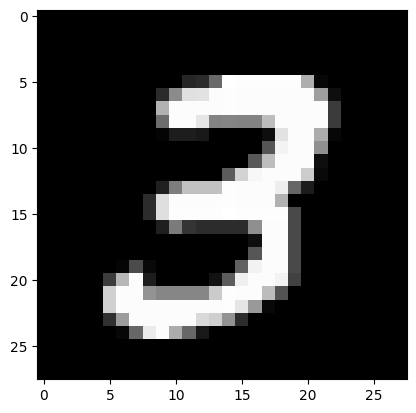

In [105]:
import matplotlib.pyplot as plt
plt.imshow(x_train_dat[7], cmap="gray")

In [89]:

instance = x_train[0].reshape(1, 28, 28, 1)
pred = cnn.predict(instance)
print(np.argmax(pred))

1/1 [==============================] - 0s 47ms/step
5


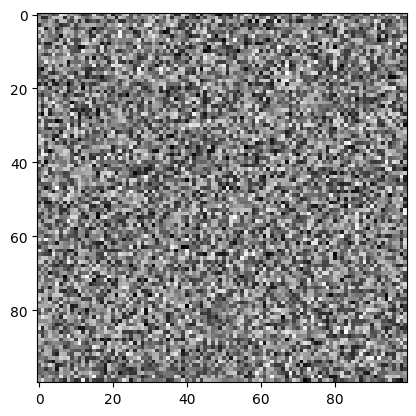

In [96]:
import numpy as np

import matplotlib.pyplot as plt

# create a random NumPy array of shape (100, 100, 3)

arr = np.random.rand(100, 100, 3)

# convert the NumPy array to grayscale

gray_arr = np.dot(arr[...,:3], [0.2989, 0.5870, 0.1140])

# plot the grayscale image using matplotlib

plt.imshow(gray_arr, cmap=plt.get_cmap('gray'))

# show the plot

plt.show()

In [97]:
print(np.unique(instance))

[0.         0.00392157 0.00784314 0.01176471 0.03529412 0.04313726
 0.05490196 0.0627451  0.07058824 0.09019608 0.09411765 0.09803922
 0.10196079 0.10588235 0.11764706 0.13725491 0.14117648 0.15294118
 0.16862746 0.1764706  0.18039216 0.19215687 0.21568628 0.21960784
 0.2509804  0.25882354 0.27450982 0.30588236 0.3137255  0.31764707
 0.32156864 0.3529412  0.3647059  0.36862746 0.41960785 0.42352942
 0.44705883 0.46666667 0.49411765 0.49803922 0.50980395 0.5176471
 0.52156866 0.5294118  0.53333336 0.54509807 0.5803922  0.5882353
 0.6039216  0.6117647  0.627451   0.6509804  0.6666667  0.67058825
 0.6745098  0.6862745  0.7137255  0.7176471  0.7294118  0.73333335
 0.74509805 0.7647059  0.7764706  0.7882353  0.8039216  0.8117647
 0.83137256 0.8352941  0.85882354 0.8666667  0.88235295 0.8862745
 0.8980392  0.93333334 0.9411765  0.94509804 0.9490196  0.95686275
 0.96862745 0.9764706  0.98039216 0.9843137  0.9882353  0.99215686
 1.        ]


In [98]:
cnn.save('number_recognizer50.h5')

/home/sohelfajal/Desktop/SSO MIG/proj/digit_recognizer.env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
x_train[0:1].shape

(1, 28, 28, 1)

In [85]:
with open("0.txt", "rb") as f:
    x = f.read()


In [67]:
import base64
import cv2
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1171341031.py, line 1)

In [77]:
print(x)
x = x.decode("utf-8")
base64_string = x[27:]
print(base64_string)

# Convert base64 string to bytes
image_bytes = base64.b64decode(base64_string)

image = Image.open(io.BytesIO(image_bytes))
image_np = np.array(image).reshape(28, 28)   

image_np

b'b\'\\x89PNG\\r\\n\\x1a\\n\\x00\\x00\\x00\\rIHDR\\x00\\x00\\x01\\x90\\x00\\x00\\x01\\x90\\x08\\x06\\x00\\x00\\x00\\x80\\xbf6\\xcc\\x00\\x00\\x00\\x01sRGB\\x00\\xae\\xce\\x1c\\xe9\\x00\\x00 \\x00IDATx^\\xed\\x9d\\x07\\xd4nUu\\xae\\x9f\\x08*\\xd2\\x8bX@\\xd4\\xa8\\x80\\x15\\x13K\\xd4$6\\xb0%\\xd1\\xd8\\x13%t\\x8cz\\xc7\\xb5\\x85\\xe85\\xc6\\x90\\xe8\\x88%\\x1a[b\\x8dR\\x04\\x0bXcKL\\x00\\x0bb\\x12\\xb1DAEA\\xae\\x1a\\x15;HG)\\xde;\\xe6\\xf1\\xfb\\x0f\\xfc\\xe7\\xfc\\xe7|\\xbb\\xac\\xb5\\xf6\\xda{?{\\x0c\\x07\\x199k\\xcd9\\xd73\\xd7\\xb7\\xdf\\x7f\\xaf\\xfak\\xf8H@\\x02\\x12\\x90\\x80\\x04:\\x10\\xf8\\xb5\\x0eu\\xac"\\x01\\tH@\\x02\\x12@\\x01\\xb1\\x13H@\\x02\\x12\\x90@\\\'\\x02\\nH\\\'lV\\x92\\x80\\x04$ \\x01\\x05\\xc4> \\x01\\tH@\\x02\\x9d\\x08( \\x9d\\xb0YI\\x02\\x12\\x90\\x80\\x04\\x14\\x10\\xfb\\x80\\x04$ \\x01\\tt"\\xa0\\x80t\\xc2f%\\tH@\\x02\\x12P@\\xec\\x03\\x12\\x90\\x80\\x04$\\xd0\\x89\\x80\\x02\\xd2\\t\\x9b\\x95$ \\x01\\tH@\\x01\\xb1\\x0fH@\\x02\\x12\\x90@\\\'\\x02\\nH\\\'lV\\

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f1098898090>

None


In [22]:
#Resizing and reshaping to keep the ratio.
resized = cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)
vect = np.asarray(resized, dtype = "uint8")

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
new_img = cv2.resize(image, (50,50))
img_gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
